# **Universidad ICESI**
*Milton Orlando Sarria*

----

# **Supuestos teóricos para el modelo lineal**


El modelo de regresión lineal es una de las herramientas más utilizadas en análisis estadístico y aprendizaje automático debido a su simplicidad y poder interpretativo. Sin embargo, para que los resultados obtenidos sean válidos y confiables, es fundamental que se cumplan ciertos **supuestos teóricos**. Estos supuestos garantizan la consistencia y la eficiencia de los estimadores, además de la validez de las pruebas estadísticas asociadas.

## **Modelo de Regresión Lineal Simple**

En el modelo de regresión lineal simple, la relación entre la variable independiente $ x $ y la variable dependiente $ y $ se expresa como:

$ h(x) = \theta_0 + \theta_1  x + \epsilon $

donde:
- $ h(x) $: valor estimado de la variable dependiente.
- $ \theta_0 $: intercepto o término constante.
- $ \theta_1 $: coeficiente que mide la pendiente de la relación entre $x$ e $y$.
- $\epsilon$: error con distribución normal

--- 

Los principales supuestos del modelo lineal incluyen:

1. **Linealidad**: La relación entre las variables independientes y la dependiente debe ser lineal. Esto implica que los cambios en $x$ producen cambios proporcionales en $y$. 
2. **Independencia**: Los errores ($ \epsilon $) deben ser independientes entre sí. Esto significa que el error de una observación no debe estar correlacionado con el error de otra.
3. **Homoscedasticidad**: Los errores tienen una varianza constante en todos los niveles de las variables independientes. Es decir, la dispersión de los residuos debe ser uniforme para todos los niveles de la variable independiente. 
4. **Normalidad de los errores**: Los errores deben seguir una distribución normal. Este supuesto es especialmente importante para la realización de inferencias estadísticas, como la construcción de intervalos de confianza y pruebas de hipótesis. $ \varepsilon \sim \mathcal{N}(0, \sigma^2)$. $\mathcal{N}$ Representa la distribución normal con media cero y varianza $\sigma^2$.
5. **Ausencia de colinealidad**: Las variables independientes no deben estar altamente correlacionadas entre sí.
6. **Especificación correcta del modelo**: El modelo debe incluir todas las variables relevantes y no debe incluir variables irrelevantes.

### ¿Qué puede suceder si no se cumplen los supuestos?

El incumplimiento de estos supuestos puede tener consecuencias importantes, tales como:

- **Sesgo en los estimadores**: Si la relación no es lineal o el modelo está mal especificado, los coeficientes estimados no representarán correctamente la relación entre las variables.
- **Pérdida de eficiencia**: La falta de homoscedasticidad puede llevar a estimaciones menos precisas, inflando o subestimando los errores estándar.
- **Pruebas estadísticas incorrectas**: Si los errores no son normales o los errores estándar están mal estimados, los intervalos de confianza y pruebas de hipótesis pueden llevar a conclusiones erróneas.
- **Sobreajuste o subajuste**: La exclusión de variables relevantes o la inclusión de variables irrelevantes puede generar un modelo que no se ajuste adecuadamente a los datos reales.
- **Multicolinealidad**: Puede dificultar la interpretación de los coeficientes, ya que será complicado determinar el efecto individual de cada variable independiente.
- **Predicciones poco confiables**: Los modelos que violan supuestos clave suelen generar predicciones inexactas o inconsistentes.

La verificación de estos supuestos es crucial para garantizar la validez de un modelo de regresión lineal. Utilizando `statsmodels` en Python, es posible realizar tanto análisis gráficos como pruebas estadísticas para evaluar cada supuesto, asegurando así la fiabilidad de las inferencias derivadas del modelo.


**Ejemplo:**

La relación entre la estatura y el peso de una persona suele ser aproximadamente lineal, ya que, en general, las personas más altas tienden a pesar más debido a una mayor masa corporal. Esta relación puede modelarse matemáticamente mediante una ecuación lineal, donde la pendiente indica el aumento promedio del peso por cada unidad adicional de estatura. Sin embargo, la pendiente puede variar según factores como el sexo, la edad y la composición corporal. Por ejemplo, dos personas con la misma estatura pueden tener pesos diferentes dependiendo de su proporción de músculo, grasa o estructura ósea.

## **Modelo de Regresión Lineal Simple**

En el modelo de regresión lineal simple, la relación entre la variable independiente $ x $ y la variable dependiente $ y $ se expresa como:

$ h(x) = 1.86 + 9.81  x

- x = 0
    $ h(0) = 1.86

- x = 1
    $ h(1) = 1.86 + 9.81


donde:
- $ h(x) $: valor estimado de la variable dependiente.
- $ \theta_0 $: intercepto o término constante.
- $ \theta_1 $: coeficiente que mide la pendiente de la relación entre $x$ e $y$.
- $\epsilon$: error con distribución normal

--- 

In [1]:
import numpy as np
import pandas as pd
import pathlib as pl
import seaborn as sns
import pingouin as pg
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan



**Ejemplos en Python: Cumplimiento y Violación de Supuestos**

A continuación, se presentan ejemplos utilizando Python para ilustrar situaciones donde los supuestos se cumplen y donde no.

*Nota*: Es recomendable utilizar bibliotecas como `numpy`, `pandas`, `matplotlib`, `seaborn` y `statsmodels` para la implementación de estos ejemplos.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

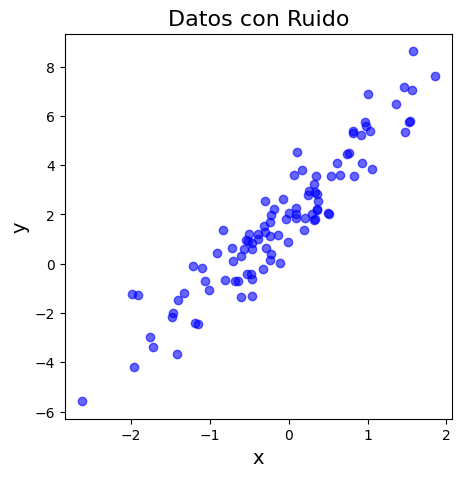

In [3]:

# Configuración de la semilla para reproducibilidad
np.random.seed(42)
# Generación de datos
n = 100
x = np.random.normal(0, 1, n)
epsilon = np.random.normal(0, 1, n)
y = 2 + 3 * x + epsilon

# Crear la gráfica
plt.figure(figsize=(5, 5))
plt.scatter(x, y, color='blue', label='Datos con ruido', alpha=0.6)
plt.title('Datos con Ruido', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

# Creación del DataFrame
data = pd.DataFrame({'x': x, 'y': y})


**Ajuste del Modelo y Verificación de Supuestos**

   Ajustamos un modelo de regresión lineal simple y verificamos los supuestos:


In [4]:
# Ajuste del modelo
X = sm.add_constant(data['x'])  # Agrega el intercepto
model = sm.OLS(data['y'], X).fit()
# Resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     739.0
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           1.94e-47
Time:                        18:48:24   Log-Likelihood:                -135.71
No. Observations:                 100   AIC:                             275.4
Df Residuals:                      98   BIC:                             280.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0074      0.096     21.002      0.0

In [5]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     739.0
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           1.94e-47
Time:                        18:48:24   Log-Likelihood:                -135.71
No. Observations:                 100   AIC:                             275.4
Df Residuals:                      98   BIC:                             280.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0074      0.096     21.002      0.000       1.818       2.197
x              2.8567      0.105     27.185      0.000       2.648       3.065
==============================================================================
Omnibus:                        1.950   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.909
Skew:                           0.327   Prob(JB):                        0.385
Kurtosis:                       2.829   Cond. No.                         1.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----
### **Alternativa**: Usar formula

In [6]:
import statsmodels.formula.api as smf
# crear modelo usando formula
lm = smf.ols(formula='y~x', data=data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     739.0
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           1.94e-47
Time:                        18:48:24   Log-Likelihood:                -135.71
No. Observations:                 100   AIC:                             275.4
Df Residuals:                      98   BIC:                             280.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0074      0.096     21.002      0.0

---
**1. Verificación de la Linealidad**

La linealidad implica que la relación entre las variables independientes y la variable dependiente es lineal. Para evaluar este supuesto, se pueden utilizar gráficos de residuos:

El **gráfico de residuos** es una herramienta esencial para evaluar la **linealidad** de la relación entre las variables en un modelo de regresión lineal. En este gráfico, los **residuos** (diferencia entre los valores observados y los valores predichos por el modelo) se trazan en función de los valores ajustados o una de las variables independientes. 

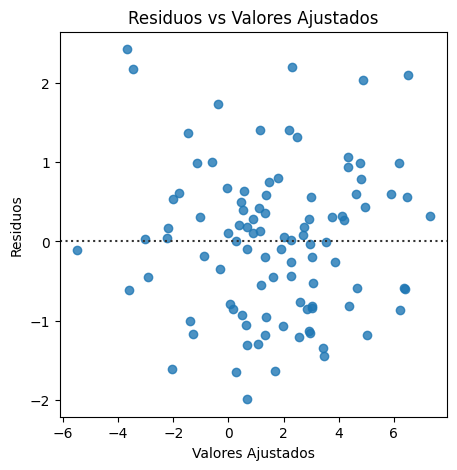

In [7]:
# Gráficos de diagnóstico
residuals = model.resid
fitted = model.fittedvalues
# Gráfico de residuos vs valores ajustados
plt.figure(figsize=(5, 5))
sns.residplot(x=fitted, y=residuals)
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados')
plt.show()


**¿Cómo ayuda a evaluar la linealidad?**

1. **Si la relación es lineal**:  
   - En un modelo correctamente especificado y lineal, los residuos se distribuyen de manera **aleatoria** alrededor de cero, sin patrones sistemáticos visibles. Esto indica que el modelo captura correctamente la relación lineal entre las variables.

2. **Si la relación no es lineal**:  
   - Si el gráfico de residuos muestra **patrones claros** (por ejemplo, una forma curva o cíclica), es una señal de que el modelo lineal no está capturando adecuadamente la relación entre las variables. Esto podría indicar que:
     - La relación entre las variables no es estrictamente lineal.
     - Es necesario incluir términos polinómicos o no lineales en el modelo.
     - Se requiere transformar alguna de las variables (como aplicar logaritmos o raíces).



**2. Verificación de la Independencia de los Errores**

La independencia de los errores significa que no existe correlación entre los residuos. Para detectar autocorrelación, especialmente en datos secuenciales o temporales, se puede utilizar la prueba de Durbin-Watson. La **prueba Durbin-Watson** evalúa la **independencia de los errores** en un modelo de regresión, especialmente para detectar **autocorrelación** en las observaciones consecutivas, lo cual es común en datos temporales. 

### Cómo funciona:
- El estadístico Durbin-Watson ($d$) toma valores entre 0 y 4:
  - $d \approx 2$: Indica independencia de los errores (sin autocorrelación).
  - $d < 2$: Sugiere autocorrelación positiva (los errores consecutivos están correlacionados en la misma dirección).
  - $d > 2$: Sugiere autocorrelación negativa (los errores consecutivos están correlacionados en direcciones opuestas).


Un valor del estadístico de Durbin-Watson cercano a 2 indica que no hay autocorrelación significativa entre los errores.


In [8]:
# Cálculo del estadístico de Durbin-Watson
dw_stat = durbin_watson(residuals)
print(f'Estadístico de Durbin-Watson: {dw_stat:.2f}')

Estadístico de Durbin-Watson: 2.19


**3. Verificación de la Homoscedasticidad**

La homoscedasticidad implica que la varianza de los errores es constante a lo largo de los valores de las variables independientes. Para evaluar este supuesto, se puede realizar la prueba de Breusch-Pagan:
Prueba la hipótesis:
   - **$H_0$**: La varianza de los errores es constante (homoscedasticidad).
   - **$H_1$**: La varianza de los errores no es constante (heteroscedasticidad).

### Interpretación:
- Un **p-valor alto** (> 0.05) indica que no hay evidencia suficiente para rechazar $H_0$, es decir, la homoscedasticidad se cumple.
- Un **p-valor bajo** (< 0.05) sugiere heteroscedasticidad, lo que podría invalidar la inferencia estadística del modelo.




In [9]:
# Realización de la prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuals, X)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))


{'LM Statistic': np.float64(0.7246269256513505), 'LM-Test p-value': np.float64(0.39463037481390306), 'F-Statistic': np.float64(0.7153177723205326), 'F-Test p-value': np.float64(0.39974441425972373)}


En este ejemplo, el estadístico del multiplicador de Lagrange para la prueba es  0.724 y el p-valor correspondiente es 0.394. Debido a que este p-valor no es menor que 0.05, no rechazamos la hipótesis nula.


**4. Verificación de la Normalidad de los Errores**

La normalidad de los errores es esencial para la validez de las inferencias estadísticas en la regresión lineal. Se puede evaluar visualmente mediante un gráfico Q-Q y estadísticamente con la prueba de Shapiro-Wilk.

El **gráfico Q-Q (Quantile-Quantile)** se utiliza para verificar si una distribución de datos sigue una distribución normal. Compara los cuartiles de los datos con los cuartiles teóricos de una distribución normal estándar.

### Interpretación:
- **Si los puntos se alinean en una línea recta**: Los datos siguen una distribución normal.
- **Si los puntos se desvían significativamente de la línea recta**: Los datos no siguen una distribución normal, mostrando colas más gruesas, asimetría o distribuciones diferentes.

Este gráfico es útil para detectar **desviaciones de la normalidad** en los datos.


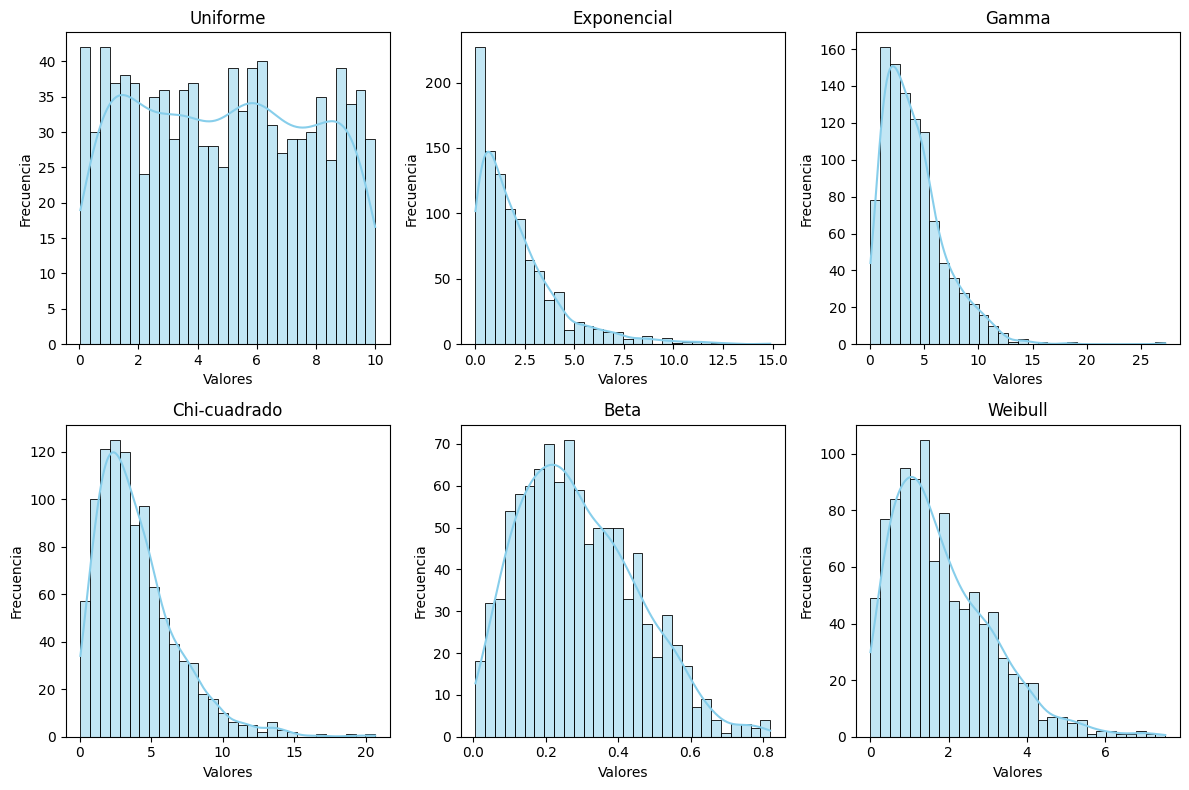

In [10]:
np.random.seed(42)

# Tamaño de las muestras
n = 1000

# Generar datos de distribuciones no normales
uniform_data = np.random.uniform(low=0, high=10, size=n)       # Distribución uniforme
exponential_data = np.random.exponential(scale=2, size=n)      # Distribución exponencial
gamma_data = np.random.gamma(shape=2, scale=2, size=n)         # Distribución gamma
chi_square_data = np.random.chisquare(df=4, size=n)            # Distribución chi-cuadrado
beta_data = np.random.beta(a=2, b=5, size=n)                   # Distribución beta
weibull_data = np.random.weibull(a=1.5, size=n) * 2            # Distribución Weibull

# Crear una lista con los datos y nombres de las distribuciones
distributions = [
    ("Uniforme", uniform_data),
    ("Exponencial", exponential_data),
    ("Gamma", gamma_data),
    ("Chi-cuadrado", chi_square_data),
    ("Beta", beta_data),
    ("Weibull", weibull_data),
]

# Visualizar las distribuciones
plt.figure(figsize=(12, 8))
for i, (name, values) in enumerate(distributions, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(values, kde=True, bins=30, color="skyblue", edgecolor="black")
    plt.title(name)
    plt.xlabel("Valores")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


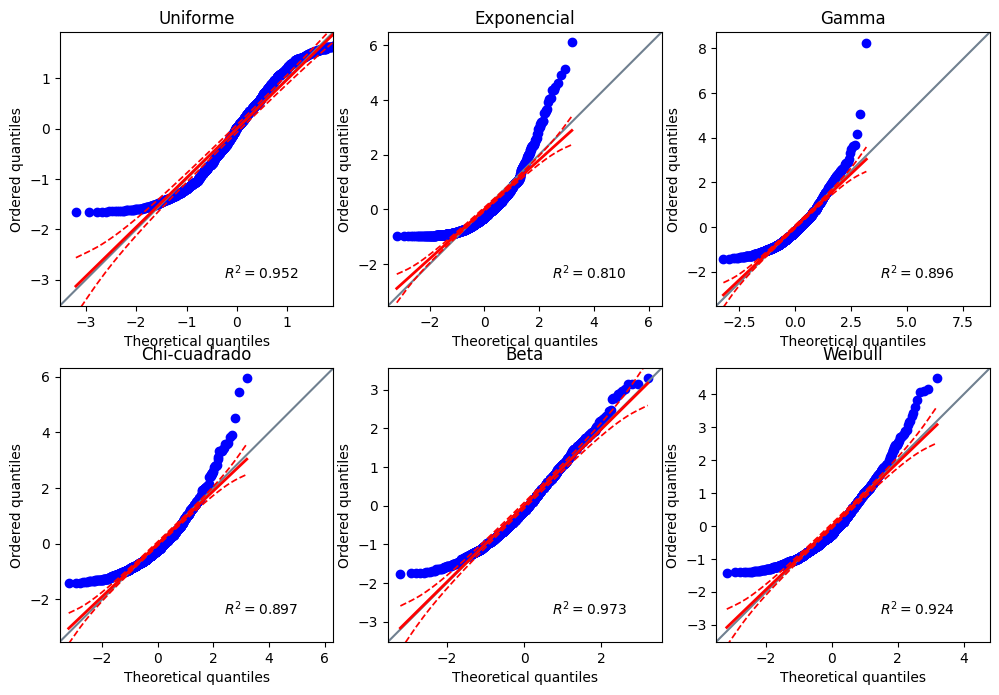

In [11]:
plt.figure(figsize=(12, 8))
for i, (name, values) in enumerate(distributions, start=1):
    plt.subplot(2, 3, i)
    pg.qqplot(values)
    plt.title(name)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

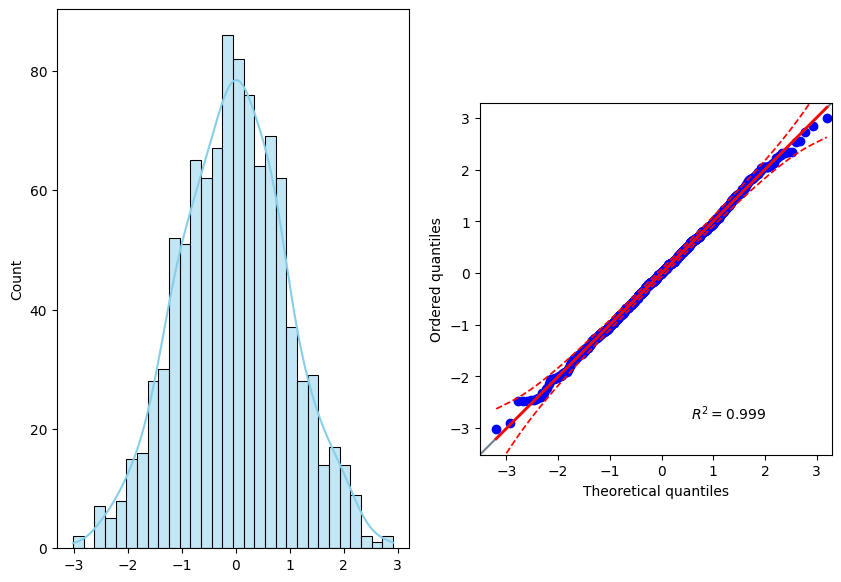

In [12]:
data_normal = np.random.normal(loc=0, scale=1, size=n)

plt.figure(figsize=(10,7))
plt.subplot(121)
sns.histplot(data_normal, kde=True, bins=30, color="skyblue", edgecolor="black")
plt.subplot(122)
pg.qqplot(data_normal)

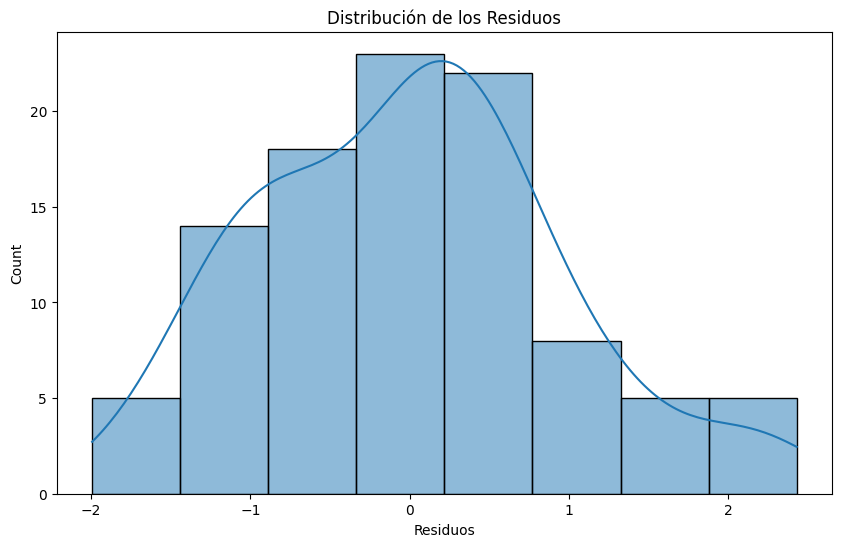

In [13]:
# Histograma de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de los Residuos')
plt.show()


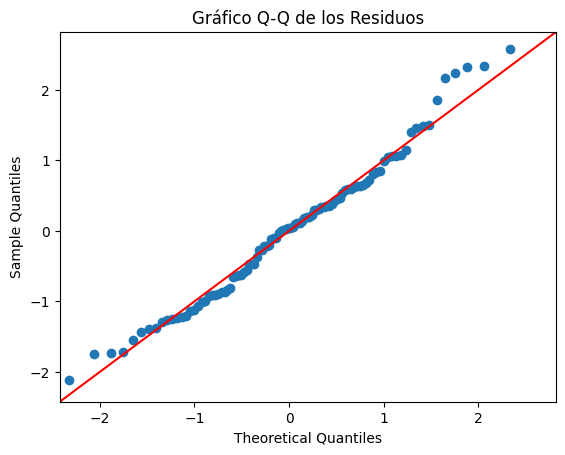

In [14]:
# Gráfico Q-Q
sm.qqplot(residuals, line='45', fit=True)
plt.title('Gráfico Q-Q de los Residuos')
plt.show()


La **prueba Shapiro-Wilk** es una prueba estadística utilizada para verificar si un conjunto de datos sigue una distribución normal.

### Cómo funciona:
- La hipótesis nula ($H_0$) establece que los datos siguen una distribución normal.
- La hipótesis alternativa ($H_1$) establece que los datos no siguen una distribución normal.

### Interpretación:
- Si el **p-valor** es **mayor que 0.05**, no se rechaza $H_0$, lo que sugiere que los datos podrían seguir una distribución normal.
- Si el **p-valor** es **menor que 0.05**, se rechaza $H_0$, lo que indica que los datos probablemente no siguen una distribución normal.

In [15]:
# Prueba de Shapiro-Wilk
shapiro_test = shapiro(residuals)
print(f'Estadístico de Shapiro-Wilk: {shapiro_test.statistic:.3f}, p-valor: {shapiro_test.pvalue:.3f}')

Estadístico de Shapiro-Wilk: 0.981, p-valor: 0.165


Un valor p alto en la prueba de Shapiro-Wilk indica que no hay evidencia suficiente para rechazar la hipótesis nula de normalidad de los errores.



 **EJEMPLO: Violación del Supuesto de Homoscedasticidad**

   Ahora, generamos datos donde la varianza de los errores no es constante (heteroscedasticidad):


In [16]:
x

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

Text(0, 0.5, 'y')

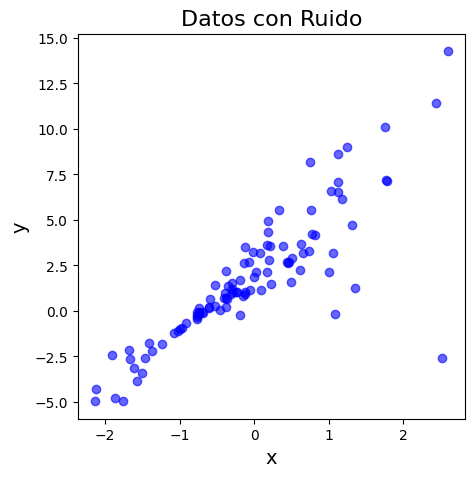

In [17]:
n = 100
x = np.random.normal(0, 1, n)

epsilon_hetero = np.random.normal(0, 1, n) * (1 + x)
y_hetero = 2 + 3 * x + epsilon_hetero
# Creación del DataFrame con heteroscedasticidad
data_hetero = pd.DataFrame({'x': x, 'y': y_hetero})
# Crear la gráfica
plt.figure(figsize=(5, 5))
plt.scatter(x, y_hetero, color='blue', label='Datos con ruido', alpha=0.6)
plt.title('Datos con Ruido', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)


In [18]:
# Ajuste del modelo con datos heteroscedásticos
X_hetero = sm.add_constant(data_hetero['x'])  # Agrega el intercepto
model_hetero = sm.OLS(data_hetero['y'], X_hetero).fit()

# Resumen del modelo
print(model_hetero.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     239.5
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           4.58e-28
Time:                        18:48:26   Log-Likelihood:                -204.22
No. Observations:                 100   AIC:                             412.4
Df Residuals:                      98   BIC:                             417.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9604      0.189     10.374      0.0

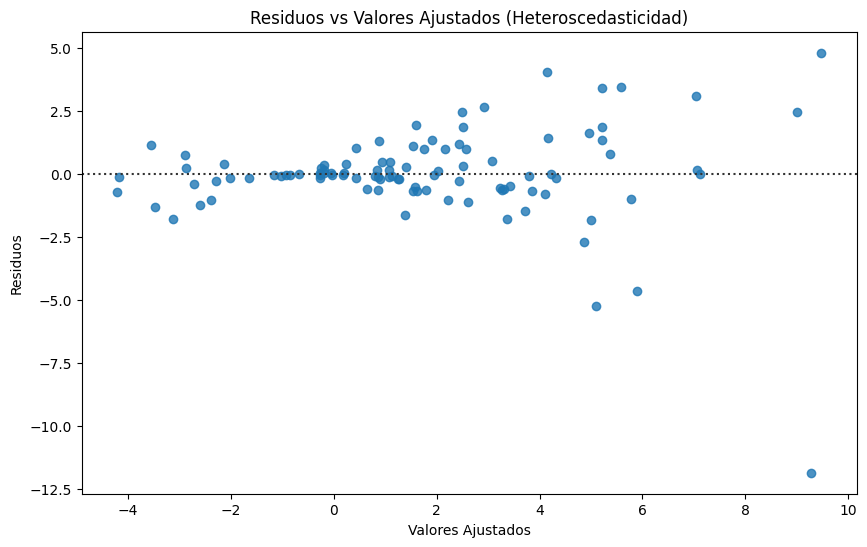

In [19]:
# Gráfico de residuos vs valores ajustados
residuals_hetero = model_hetero.resid
fitted_hetero = model_hetero.fittedvalues

plt.figure(figsize=(10, 6))
sns.residplot(x=fitted_hetero, y=residuals_hetero)
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados (Heteroscedasticidad)')
plt.show()


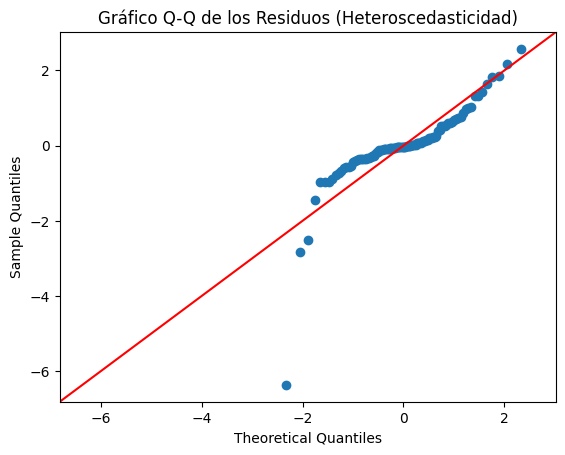

In [20]:
# Gráfico Q-Q
sm.qqplot(residuals_hetero, line='45', fit=True)
plt.title('Gráfico Q-Q de los Residuos (Heteroscedasticidad)')
plt.show()


In [21]:
# Cálculo del estadístico de Durbin-Watson
dw_stat = durbin_watson(residuals_hetero)
print(f'Estadístico de Durbin-Watson: {dw_stat:.2f}')

# Realización de la prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuals_hetero, X)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

# Prueba de Shapiro-Wilk
shapiro_test = shapiro(residuals_hetero)
print(f'Estadístico de Shapiro-Wilk: {shapiro_test.statistic:.3f}, p-valor: {shapiro_test.pvalue:.3f}')


Estadístico de Durbin-Watson: 2.07
{'LM Statistic': np.float64(3.4362430739719563), 'LM-Test p-value': np.float64(0.06378057109928237), 'F-Statistic': np.float64(3.4873521077604455), 'F-Test p-value': np.float64(0.06482800727940571)}
Estadístico de Shapiro-Wilk: 0.763, p-valor: 0.000


### Interpretación de los Resultados

1. **Residuos vs Valores Ajustados**: 
   - En el caso de heteroscedasticidad, el gráfico muestra un patrón en forma de cono o dispersión variable. Esto viola el supuesto de varianza constante.

2. **Distribución de los Residuos**: 
   - Aunque la normalidad puede mantenerse, la falta de homoscedasticidad puede sesgar los intervalos de confianza y las pruebas de significancia.

3. **Gráfico Q-Q**:
   - Si los residuos no se ajustan bien a la línea diagonal, también podrían violarse los supuestos de normalidad.



----

# ✏️ **Actividades independientes:**
Para los siguientes casos, verificar supuestos teóricos, disuctir resultados.

### 📖 **Caso 1: Horas de Estudio y Calificaciones**  
📂 **Datos:** Registro de estudiantes con sus horas de estudio y calificaciones:  `score_updated.csv`

In [22]:
current_path    = pl.Path.cwd().parent
data_path       = current_path.joinpath('Data', 'Sesion 1')
docs_list       = list(data_path.glob('*.csv'))

In [23]:
docs_list

[WindowsPath('e:/ICESI/Codigos/Data/Sesion 1/Advertising.csv'),
 WindowsPath('e:/ICESI/Codigos/Data/Sesion 1/dataset_2190_cholesterol.csv'),
 WindowsPath('e:/ICESI/Codigos/Data/Sesion 1/Ice_cream_selling_data.csv'),
 WindowsPath('e:/ICESI/Codigos/Data/Sesion 1/score.csv'),
 WindowsPath('e:/ICESI/Codigos/Data/Sesion 1/score_updated.csv'),
 WindowsPath('e:/ICESI/Codigos/Data/Sesion 1/sleepdata.csv')]

In [24]:
number = 4
print(f'El archivo score_updated.csv se encuentra en la siguiente ruta: {docs_list[number]}')
df = pd.read_csv(docs_list[number])
df.shape

El archivo score_updated.csv se encuentra en la siguiente ruta: e:\ICESI\Codigos\Data\Sesion 1\score_updated.csv


(96, 2)

In [25]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [26]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [27]:
x = df['Hours']
y = df['Scores']

Text(0, 0.5, 'y')

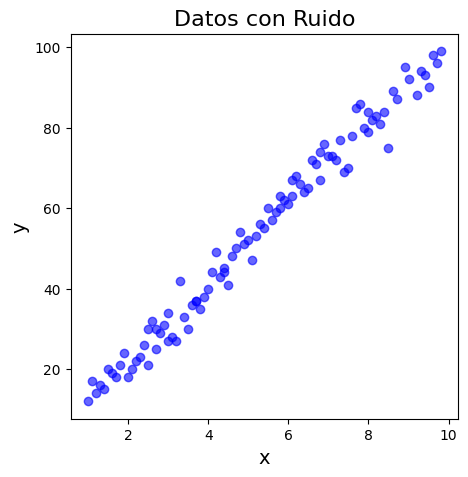

In [28]:
plt.figure(figsize=(5, 5))
plt.scatter(x, y, color='blue', label='Horas Vs Scores', alpha=0.6)
plt.title('Datos con Ruido', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

In [29]:
# Ajuste del modelo
X = sm.add_constant(x)  # Agrega el intercepto
model_1 = sm.OLS(y, X).fit()

print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     4951.
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           4.18e-83
Time:                        18:48:27   Log-Likelihood:                -253.62
No. Observations:                  96   AIC:                             511.2
Df Residuals:                      94   BIC:                             516.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8636      0.820      2.273      0.0

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     739.0
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           1.94e-47
Time:                        18:48:27   Log-Likelihood:                -135.71
No. Observations:                 100   AIC:                             275.4
Df Residuals:                      98   BIC:                             280.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0074      0.096     21.002      0.000       1.818       2.197
x              2.8567      0.105     27.185      0.000       2.648       3.065
==============================================================================
Omnibus:                        1.950   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.909
Skew:                           0.327   Prob(JB):                        0.385
Kurtosis:                       2.829   Cond. No.                         1.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



### 📖 **Caso 2: Temperatura y Ventas de Helado**  
📂 **Datos:** Temperatura diaria y ventas de helado en una heladería: `Ice_cream_selling_data.csv`